In [1]:
import pandas as pd

col_names = ["id", "box_x", "box_y", "box_z", "position_x", "position_y", "position_z", "bin_x", "bin_y", "bin_z"]
filepath = "./tmpFolder/box-generated-data.csv"
data = pd.read_csv(filepath, names=col_names) 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
warnings.filterwarnings("ignore")

In [3]:
# First we see our data

data.head(2) 

len(data)

len(data.columns)

data.describe()

,id,box_x,box_y,box_z,position_x,position_y,position_z,bin_x,bin_y,bin_z
0,0,1.5,5.0,1.0,35,4,63,7.715833,7.824166,18.734165
1,1,2.0,1.5,5.0,44,96,19,7.715833,7.824166,18.734165


10

10

,id,box_x,box_y,box_z,position_x,position_y,position_z,bin_x,bin_y,bin_z
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01
mean,4.50000,3.15000,2.950000,2.500000,51.700000,54.000000,42.000000,7.715833e+00,7.824166e+00,1.873416e+01
std,3.02765,1.29207,1.212206,1.224745,29.563679,35.077692,33.767177,9.362223e-16,9.362223e-16,3.744889e-15
min,0.00000,1.50000,1.500000,1.000000,9.000000,1.000000,2.000000,7.715833e+00,7.824166e+00,1.873417e+01
25%,2.25000,2.00000,2.000000,1.625000,32.250000,23.000000,8.500000,7.715833e+00,7.824166e+00,1.873417e+01
50%,4.50000,3.50000,3.000000,2.250000,39.500000,68.500000,45.500000,7.715833e+00,7.824166e+00,1.873417e+01
75%,6.75000,4.00000,3.875000,2.875000,80.000000,74.750000,70.750000,7.715833e+00,7.824166e+00,1.873417e+01
max,9.00000,5.00000,5.000000,5.000000,90.000000,96.000000,86.000000,7.715833e+00,7.824166e+00,1.873417e+01


In [4]:
# we calculate the volumes of the boxes and add it to the dataframe
volumes = [];
for index, row in data.iterrows():
    volumes.append(row["box_x"]*row["box_y"]*row["box_z"])
data["box_volume"] = volumes
data
    
      

,id,box_x,box_y,box_z,position_x,position_y,position_z,bin_x,bin_y,bin_z,box_volume
0,0,1.5,5.0,1.0,35,4,63,7.715833,7.824166,18.734165,7.500
1,1,2.0,1.5,5.0,44,96,19,7.715833,7.824166,18.734165,15.000
2,2,1.5,4.0,2.5,27,1,28,7.715833,7.824166,18.734165,15.000
3,3,2.0,2.5,2.0,33,83,2,7.715833,7.824166,18.734165,10.000
4,4,4.0,2.0,2.5,9,11,86,7.715833,7.824166,18.734165,20.000
5,5,3.5,3.5,1.5,32,74,3,7.715833,7.824166,18.734165,18.375
6,6,3.5,1.5,1.5,89,75,5,7.715833,7.824166,18.734165,7.875
7,7,5.0,4.0,3.0,81,72,73,7.715833,7.824166,18.734165,60.000
8,8,4.5,2.0,4.0,77,65,64,7.715833,7.824166,18.734165,36.000
9,9,4.0,3.5,2.0,90,59,77,7.715833,7.824166,18.734165,28.000


In [5]:
# we calculate the bin volume and total volumes of the boxes next

bin_volume = (data["bin_x"]*data["bin_y"]*data["bin_z"])[0]
print(bin_volume)


total_box_volume = data["box_volume"].sum()
print(total_box_volume)



1130.9807583417944
217.75


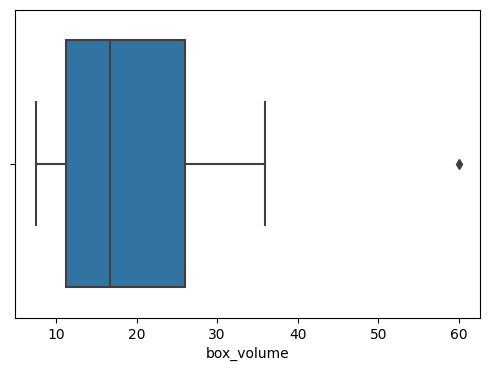

In [6]:
# we plot the volume distribution of boxes using boxplot

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(data, x="box_volume");

In [7]:
# we calculate the 3 surface areas of the boxes

side_xy_sa = []
for index, row in data.iterrows():
    side_xy_sa.append(row["box_x"]*row["box_y"])
data["side_xy_sa"] = side_xy_sa

side_xz_sa = []
for index, row in data.iterrows():
    side_xz_sa.append(row["box_x"]*row["box_z"])
data["side_xz_sa"] = side_xz_sa

side_yz_sa = []
for index, row in data.iterrows():
    side_yz_sa.append(row["box_z"]*row["box_y"])
data["side_yz_sa"] = side_yz_sa

data



,id,box_x,box_y,box_z,position_x,position_y,position_z,bin_x,bin_y,bin_z,box_volume,side_xy_sa,side_xz_sa,side_yz_sa
0,0,1.5,5.0,1.0,35,4,63,7.715833,7.824166,18.734165,7.500,7.50,1.50,5.00
1,1,2.0,1.5,5.0,44,96,19,7.715833,7.824166,18.734165,15.000,3.00,10.00,7.50
2,2,1.5,4.0,2.5,27,1,28,7.715833,7.824166,18.734165,15.000,6.00,3.75,10.00
3,3,2.0,2.5,2.0,33,83,2,7.715833,7.824166,18.734165,10.000,5.00,4.00,5.00
4,4,4.0,2.0,2.5,9,11,86,7.715833,7.824166,18.734165,20.000,8.00,10.00,5.00
5,5,3.5,3.5,1.5,32,74,3,7.715833,7.824166,18.734165,18.375,12.25,5.25,5.25
6,6,3.5,1.5,1.5,89,75,5,7.715833,7.824166,18.734165,7.875,5.25,5.25,2.25
7,7,5.0,4.0,3.0,81,72,73,7.715833,7.824166,18.734165,60.000,20.00,15.00,12.00
8,8,4.5,2.0,4.0,77,65,64,7.715833,7.824166,18.734165,36.000,9.00,18.00,8.00
9,9,4.0,3.5,2.0,90,59,77,7.715833,7.824166,18.734165,28.000,14.00,8.00,7.00


In [8]:
# we will calculate the total surface area of the boxes

total_sa = []
for index, row in data.iterrows():
    total_sa.append((row["side_xy_sa"]+row["side_xz_sa"]+row["side_yz_sa"])*2)
data["total_sa"] = total_sa

data

,id,box_x,box_y,box_z,position_x,position_y,position_z,bin_x,bin_y,bin_z,box_volume,side_xy_sa,side_xz_sa,side_yz_sa,total_sa
0,0,1.5,5.0,1.0,35,4,63,7.715833,7.824166,18.734165,7.500,7.50,1.50,5.00,28.0
1,1,2.0,1.5,5.0,44,96,19,7.715833,7.824166,18.734165,15.000,3.00,10.00,7.50,41.0
2,2,1.5,4.0,2.5,27,1,28,7.715833,7.824166,18.734165,15.000,6.00,3.75,10.00,39.5
3,3,2.0,2.5,2.0,33,83,2,7.715833,7.824166,18.734165,10.000,5.00,4.00,5.00,28.0
4,4,4.0,2.0,2.5,9,11,86,7.715833,7.824166,18.734165,20.000,8.00,10.00,5.00,46.0
5,5,3.5,3.5,1.5,32,74,3,7.715833,7.824166,18.734165,18.375,12.25,5.25,5.25,45.5
6,6,3.5,1.5,1.5,89,75,5,7.715833,7.824166,18.734165,7.875,5.25,5.25,2.25,25.5
7,7,5.0,4.0,3.0,81,72,73,7.715833,7.824166,18.734165,60.000,20.00,15.00,12.00,94.0
8,8,4.5,2.0,4.0,77,65,64,7.715833,7.824166,18.734165,36.000,9.00,18.00,8.00,70.0
9,9,4.0,3.5,2.0,90,59,77,7.715833,7.824166,18.734165,28.000,14.00,8.00,7.00,58.0


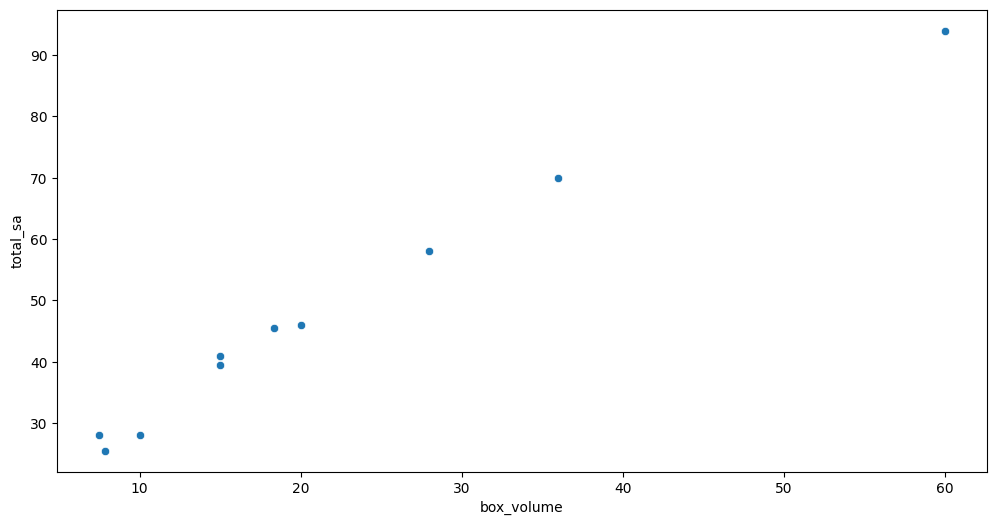

In [9]:
# we will visualize the relationship between surface area and volume

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="box_volume", y="total_sa");